In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
import re
from pprint import pprint
import seaborn as sns

In [9]:
ROOT_DATE_DIR = "./Tested Dates"

In [10]:
for _, _, files in os.walk(ROOT_DATE_DIR):
    date_file_paths = [ROOT_DATE_DIR + "/" + file for file in files]
date_file_paths = sorted(date_file_paths, key = lambda x : int(x.split(" ")[-1].strip(".txt")))

In [13]:
def parser(file_path):
    '''
    Requirement: Should take path of the file (.txt), and return the letter and word accuracy in a list form. 
    '''
    with open(file_path) as file:
        file_txt_data = file.readlines()
        all_data = []
        temp_list = []
        date_list = []
        for line in file_txt_data:
            if '2023' in line:
                date_list.append(line.strip('\n'))
            elif 'Letters' in line:
                temp_list.append(line)
                if len(temp_list) == 2:
                    ratios = temp_list[0].split(' ')
                    accuracies = temp_list[1].split(' ')
                    letters_correct = ratios[2]
                    words_correct = ratios[6]
                    letters_accu = accuracies[2]
                    words_accu = accuracies[6]
                    all_data.append((date_list[-1], letters_correct, words_correct.strip('\n'), float(letters_accu.strip('%\n')) / 100, float(words_accu.strip('%\n')) / 100))
                    temp_list = []

        test_infer_df = pd.DataFrame(all_data, columns = ['Date', 'Letters Correct (correct/total)', 'Words Correct (correct/total)', 'Letters Accuracy', 'Words Accuracy'])
        return test_infer_df

In [51]:
total_test_length = len(parser(date_file_paths[0]))

with open('./dates with time.txt') as f:
    time_data = f.readlines()

time_rel_data = []
for time_d in time_data:
    time_string = time_d.split(' ')[-1].strip('\n')
    match = re.search(r'(\d+)m(\d+)s', time_string)
    minutes = int(match.group(1))
    seconds = int(match.group(2))
    time_rel_data.append(round((minutes * 60 + seconds) / total_test_length, 2))

In [56]:
overall_data = []
for i, date_path in enumerate(date_file_paths):
    candidate_size = int(date_path.split(' ')[-1].strip(".txt"))
    let_accu, word_accu = parser(date_path)[['Letters Accuracy', 'Words Accuracy']].mean().tolist()
    overall_data.append((candidate_size, let_accu, word_accu, time_rel_data[i]))
df_data = pd.DataFrame(overall_data, columns = ['Maximum Candidates', 'Avg. Letters Accuracy', 'Avg. Words Accuracy', 'Time Taken per Puzzle'])

C:\Users\parzi\AppData\Local\Temp\ipykernel_6980\300903909.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), fontdict={'family': 'serif'})
C:\Users\parzi\AppData\Local\Temp\ipykernel_6980\300903909.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticklabels(), fontdict={'family': 'serif'})


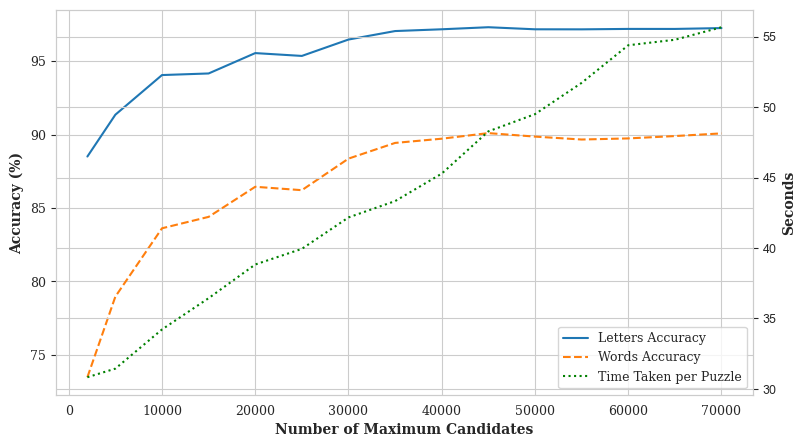

In [133]:
sns.set_style("whitegrid")

# Create the primary y-axis plot (left side)
fig, ax1 = plt.subplots(figsize = (9, 5))

ax1.plot(df_data['Maximum Candidates'], df_data['Avg. Letters Accuracy'] * 100, label='Letters Accuracy')
ax1.plot(df_data['Maximum Candidates'], df_data['Avg. Words Accuracy'] * 100, label='Words Accuracy', linestyle = '--')
ax1.set_xlabel('Number of Maximum Candidates', fontdict={'fontsize': 10, 'fontweight': 'bold', 'family': 'serif'})
ax1.set_ylabel('Accuracy (%)', fontdict={'fontsize': 10, 'fontweight': 'bold', 'family': 'serif'})
ax1.tick_params(axis='y', labelsize = 9)
ax1.tick_params(axis='x', labelsize = 9)
ax1.set_xticklabels(ax1.get_xticklabels(), fontdict={'family': 'serif'})
ax1.set_yticklabels(ax1.get_yticklabels(), fontdict={'family': 'serif'})


# Create a secondary y-axis plot (right side)
ax2 = ax1.twinx()

ax2.plot(df_data['Maximum Candidates'], df_data['Time Taken per Puzzle'], linestyle = ':', label='Time Taken per Puzzle', color = 'g')
ax2.set_ylabel('Seconds', fontdict = {'fontsize': 10, 'fontweight': 'bold', 'family': 'serif'})
ax2.tick_params(axis='y', labelsize = 9)

# Add legends for both plots
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right',  prop={'size': 9, 'family': 'serif'})
plt.savefig("./sweet spot finding.png", dpi = 300, bbox_inches = 'tight')
plt.show()